In [7]:
import numpy as np
import scipy as sp
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt
import var_ntime 


In [8]:
import statsmodels.formula.api as smf

In [9]:
df=pd.DataFrame()

In [47]:
beta1=0.5
df['X']=np.arange(500)
# df['Y']=df['X']*beta1+ df['X'].apply(lambda t: t**2) + stats.norm.rvs(size=df.shape[0],loc=0,scale=0.5)
df['Y']=df['X']*beta1+stats.norm.rvs(size=df.shape[0],loc=0,scale=0.5)

In [11]:
olsm=smf.ols('Y~X',data=df).fit()

In [12]:
print(olsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.041e+07
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:32:35   Log-Likelihood:                -361.80
No. Observations:                 500   AIC:                             727.6
Df Residuals:                     498   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0077      0.045      0.173      0.8

In [13]:
olsm.rsquared

0.9999521845958235

In [14]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [15]:
lr.fit(df[['X']],df['Y'])

LinearRegression()

In [16]:
lr.coef_

array([0.49985637])

In [17]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [18]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)
print("lr.score:",lr.score(df[['X']],df['Y']))

lr.coef_: [0.49985637]
lr.intercept_: 0.007742425729162505
lr.score: 0.9999521845958235


<AxesSubplot:xlabel='X', ylabel='Y'>

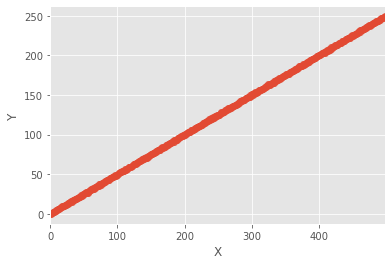

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot']) # optional: for ggplot-like style
sns.regplot(x='X',y='Y',data=df)

# plt.ylim(0,)

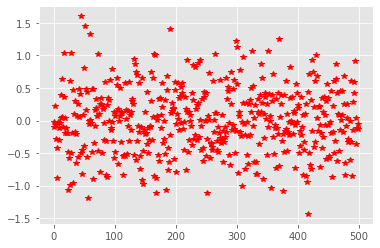

In [20]:
# check if there is correlation between e and X
plt.plot(df['X'],olsm.resid,'r*')

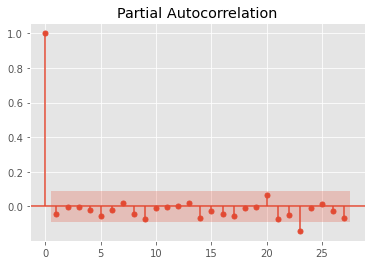

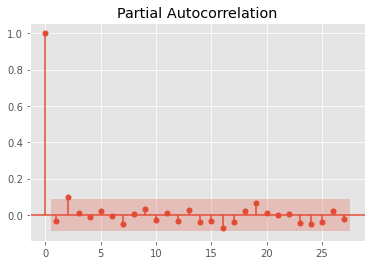

In [21]:
# check auto-correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_pacf(olsm.resid)
fig2=plot_pacf(olsm.resid.abs())

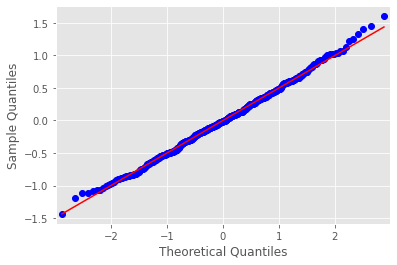

In [22]:
# check for normal distribution
from statsmodels.graphics.api import qqplot
fig4=qqplot(olsm.resid,line='s')

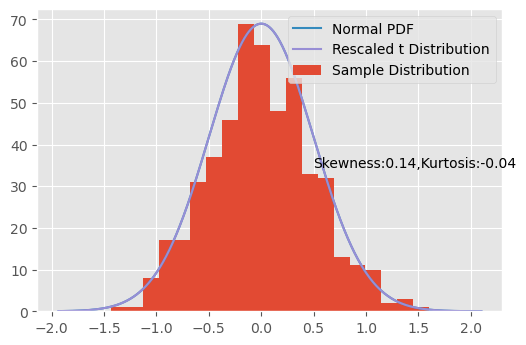

In [23]:
import var_ntime as nvar
nvar.myhist(olsm.resid,bins=20)

<AxesSubplot:ylabel='Density'>

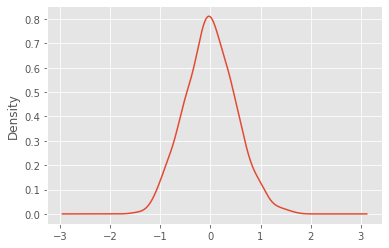

In [24]:
# plt.plot(olsm.resid,kind='kde')
olsm.resid.plot(kind='kde')
# olsm.resid.plot(kind='hist')

In [25]:
np.dot(olsm.params.tolist(),[1,2])

ERROR! Session/line number was not unique in database. History logging moved to new session 335


In [34]:
olsm.get_prediction([1])

In [36]:
# fit the data
stats.norm.fit(olsm.resid)

(-2.964029022223258e-14, 0.49890521023326584)

In [37]:
# fitted values
olsm.fittedvalues


0        0.007742
1        0.507599
2        1.007455
3        1.507312
4        2.007168
          ...    
495    247.436644
496    247.936500
497    248.436357
498    248.936213
499    249.436069
Length: 500, dtype: float64

<AxesSubplot:xlabel='X', ylabel='Y'>

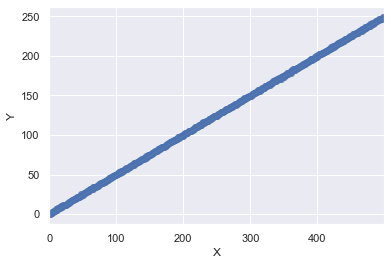

In [49]:
# mpl.style.use(['ggplot'])
# use sns default theme:
sns.set_theme()
sns.regplot(x="X",y="Y",data=df)


<Figure size 720x576 with 0 Axes>

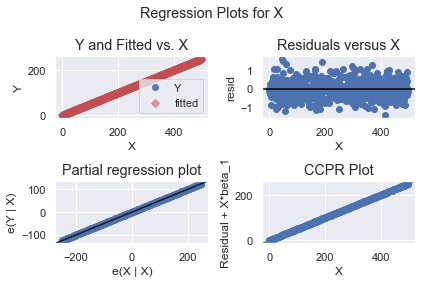

In [73]:
# Single Variable Regression Diagnostics
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(olsm, "X")
fig.tight_layout(pad=1.0)
plt.show()

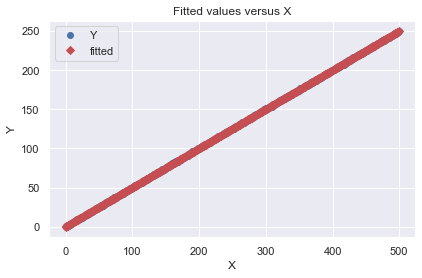

In [57]:
#Fit Plot
#The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.
fig = sm.graphics.plot_fit(olsm, "X")
fig.tight_layout(pad=1.0)

In [60]:
# olsm.predict(df[['X']])
print(3)

0        0.007742
1        0.507599
2        1.007455
3        1.507312
4        2.007168
          ...    
495    247.436644
496    247.936500
497    248.436357
498    248.936213
499    249.436069
Length: 500, dtype: float64

In [61]:
# Insample predictions:
olsm.predict(df['X'])

0        0.007742
1        0.507599
2        1.007455
3        1.507312
4        2.007168
          ...    
495    247.436644
496    247.936500
497    248.436357
498    248.936213
499    249.436069
Length: 500, dtype: float64

In [64]:
olsm.fittedvalues


0    0.257671
1    0.757527
dtype: float64

In [ ]:
# out-of-sample predictions:
olsm.predict(pd.DataFrame({'X':[0.5,1.5]}))
